# Module Import

In [9]:
import pandas as pd
import numpy as np
import json, os
from glob import glob
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as matimg

# Data Load

In [10]:
# 데이터의 Path 설정
Train_Img_path = "../Data/Raw/Train/image/*"
Train_Json_path = "../Data/Raw/Train/label/*"
Val_Img_path = "../Data/Raw/Val/image/*"
Val_Json_path = "../Data/Raw/Val/label/*"

#데이터를 배열형태로 받아온다.
TrainImg = glob(Train_Img_path)
TrainJson = glob(Train_Json_path)
ValImg = glob(Val_Img_path)
ValJson = glob(Val_Json_path)

TrainImg.sort()
TrainJson.sort()

In [11]:
print(f"학습 데이터 갯수 : {len(TrainImg)}\n검증 데이터 갯수 : {len(ValImg)}")

학습 데이터 갯수 : 32385
검증 데이터 갯수 : 4289


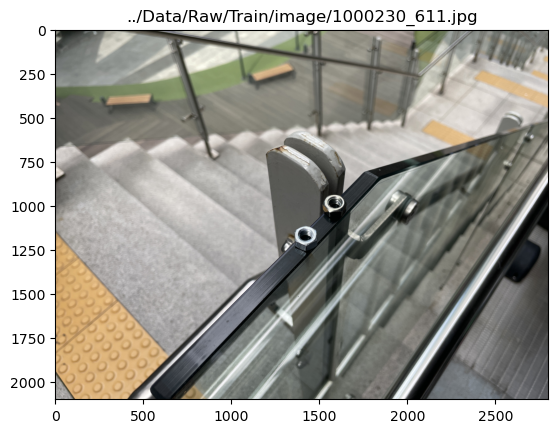

In [12]:
img_test = matimg.imread(TrainImg[1])
plt.title(TrainImg[1])
plt.imshow(img_test)
plt.show()

## ENCODER

In [13]:
labelEncoder = {}
with open(TrainJson[0]) as f:
    json_obj = json.load(f)
    
    categories = json_obj['categories']
    for categorie in categories:
        labelEncoder[categorie['class_id']] = categorie['class_name']

In [14]:
encoder = {}
for i in range(24):
    encoder[i+333] = i

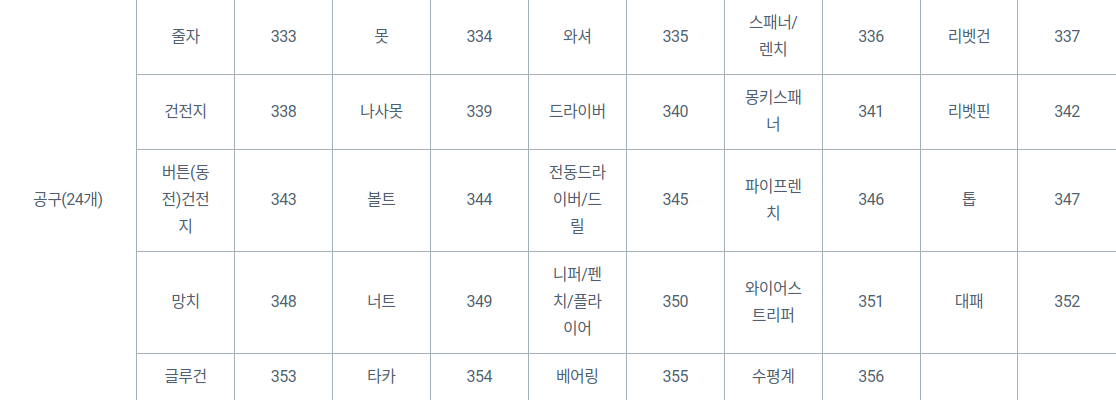

# Make CSV

In [15]:
def makeDataFrame(TrainJson,istrain):
    totallist = []
    empty = []
    for path in TrainJson:
        with open(path) as f:
            json_obj = json.load(f)
            
            file_name = json_obj['images'][0]['file_name']
            if (os.path.isfile(f"../Data/Raw/Train/image/{file_name}") == False):
                print(f"{istrain} {file_name} is not exists")
                continue
            width, height = json_obj['images'][0]['width'] , json_obj['images'][0]['height']

            boxlist = []
            category_ides = []
            
            for boundingbox in json_obj['annotations']:
                if boundingbox['bbox'][2] <= 0:
                    print(f"width : {boundingbox['bbox'][2]} 결측 {istrain}")
                    continue
                if boundingbox['bbox'][3] <= 0:
                    print(f"height : {boundingbox['bbox'][2]} 결측 {istrain}")
                    continue
                
                boxlist.append(boundingbox['bbox'])
                category_ides.append(boundingbox['category_id'])
        
        label = []
        class_name = []
        for i in range(len(boxlist)):
            class_name.append(labelEncoder[category_ides[i]])
            label.append(encoder[category_ides[i]])
            

        if (file_name == empty or category_ides == empty or boxlist == empty or class_name == empty):
            print(f"데이터가 존재하지 않음. EMPTY")
            continue
            
        jsonlist = [file_name,width,height,label,boxlist,class_name, len(boxlist)]
        totallist.append(jsonlist)
    
    df = pd.DataFrame(totallist, columns=['file_name','width','height','category_id', 'bbox','class_name','obj_num'])
    print(f"{istrain}데이프레임 생성 완료")
    return df

In [16]:
traindf = makeDataFrame(TrainJson,"Train")
valdf = makeDataFrame(ValJson,"Val")
traindf.to_csv('../Data/train_df',index= False)
valdf.to_csv('../Data/val_df',index= False)

Train 1000296_611.jpg is not exists
Train 1000346_611.jpg is not exists
Train 1000364_611.jpg is not exists
Train 1000389_611.jpg is not exists
Train 1000406_611.jpg is not exists
Train 1000407_611.jpg is not exists
Train 1000408_611.jpg is not exists
Train 1000438_611.jpg is not exists
Train 1000480_611.jpg is not exists
Train 1000511_611.jpg is not exists
Train 1000522_611.jpg is not exists
Train 1001231_611.jpg is not exists
Train 1001305_611.jpg is not exists
Train 1001355_611.jpg is not exists
Train 1001365_611.jpg is not exists
Train 1001383_611.jpg is not exists
Train 1001469_611.jpg is not exists
Train 1001643_611.jpg is not exists
Train 1001653_611.jpg is not exists
Train 1001855_611.jpg is not exists
Train 1001883_611.jpg is not exists
Train 1001908_611.jpg is not exists
Train 1001913_611.jpg is not exists
Train 1001929_611.jpg is not exists
Train 1002388_611.jpg is not exists
Train 1002394_611.jpg is not exists
Train 1002404_611.jpg is not exists
Train 1002442_611.jpg is not

Train 1087100_611.jpg is not exists
Train 1087126_611.jpg is not exists
Train 1087438_611.jpg is not exists
Train 1088361_611.jpg is not exists
Train 1088887_611.jpg is not exists
Train 1089514_611.jpg is not exists
Train 1090575_611.jpg is not exists
Train 1091088_611.jpg is not exists
Train 1091189_611.jpg is not exists
Train 1091245_611.jpg is not exists
Train 1091697_611.jpg is not exists
Train 1098691_611.jpg is not exists
Train 1099192_611.jpg is not exists
Train 1099387_611.jpg is not exists
Train 1099424_611.jpg is not exists
Train 1099959_611.jpg is not exists
Train 1100065_611.jpg is not exists
Train 1100079_611.jpg is not exists
Train 1100096_611.jpg is not exists
Train 1100122_611.jpg is not exists
Train 1100145_611.jpg is not exists
Train 1100397_611.jpg is not exists
Train 1100467_611.jpg is not exists
Train 1100573_611.jpg is not exists
Train 1100591_611.jpg is not exists
Train 1100645_611.jpg is not exists
Train 1100807_611.jpg is not exists
Train 1100834_611.jpg is not

Train 1216348_611.jpg is not exists
Train 1216354_611.jpg is not exists
Train 1216373_611.jpg is not exists
Train 1217559_611.jpg is not exists
Train 1217574_611.jpg is not exists
Train 1217589_611.jpg is not exists
Train 1218760_611.jpg is not exists
Train 1228540_611.jpg is not exists
Train 1228956_611.jpg is not exists
Train 1233900_611.jpg is not exists
Train 1233904_611.jpg is not exists
Train 1233947_611.jpg is not exists
Train 1238559_611.jpg is not exists
Train 1238681_611.jpg is not exists
Train 1238714_611.jpg is not exists
Train 1238798_611.jpg is not exists
Train 1238832_611.jpg is not exists
Train 1238833_611.jpg is not exists
Train 1238938_611.jpg is not exists
Train 1238947_611.jpg is not exists
Train 1238969_611.jpg is not exists
Train 1239129_611.jpg is not exists
Train 1239276_611.jpg is not exists
Train 1239296_611.jpg is not exists
Train 1239316_611.jpg is not exists
Train 1239333_611.jpg is not exists
Train 1239344_611.jpg is not exists
Train 1239382_611.jpg is not

Train 1482331_611.jpg is not exists
Train 1490042_611.jpg is not exists
Train 1493127_611.jpg is not exists
Train 1493134_611.jpg is not exists
Train 1493163_611.jpg is not exists
Train 1493248_611.jpg is not exists
Train 1493252_611.jpg is not exists
Train 1494648_611.jpg is not exists
Train 1495111_611.jpg is not exists
Train 1495398_611.jpg is not exists
Train 1495405_611.jpg is not exists
Train 1495716_611.jpg is not exists
Train 1495745_611.jpg is not exists
Train 1495974_611.jpg is not exists
Train 1495994_611.jpg is not exists
Train 1496004_611.jpg is not exists
Train 1506123_611.jpg is not exists
Train 1506172_611.jpg is not exists
Train 1506215_611.jpg is not exists
Train 1506243_611.jpg is not exists
Train 1506245_611.jpg is not exists
Train 1506323_611.jpg is not exists
Train 1506675_611.jpg is not exists
Train 1506738_611.jpg is not exists
Train 1506832_611.jpg is not exists
Train 1506862_611.jpg is not exists
Train 1506865_611.jpg is not exists
Train 1506919_611.jpg is not

Train 1785215_611.jpg is not exists
Train 1787590_611.jpg is not exists
Train 1787742_611.jpg is not exists
Train 1797837_611.jpg is not exists
데이터가 존재하지 않음. EMPTY
Train 1797903_611.jpg is not exists
Train 1802854_611.jpg is not exists
Train 1802856_611.jpg is not exists
Train 1802904_611.jpg is not exists
Train 1802910_611.jpg is not exists
Train 1802914_611.jpg is not exists
Train 1804936_611.jpg is not exists
Train 1809303_611.jpg is not exists
Train 1809313_611.jpg is not exists
Train 1809543_611.jpg is not exists
Train 1810053_611.jpg is not exists
Train 1811042_611.jpg is not exists
Train 1811433_611.jpg is not exists
Train 1816361_611.jpg is not exists
Train 1816558_611.jpg is not exists
Train 1816696_611.jpg is not exists
Train 1818932_611.jpg is not exists
Train 1818935_611.jpg is not exists
Train 1819616_611.jpg is not exists
Train 1819691_611.jpg is not exists
Train 1819936_611.jpg is not exists
Train 1820083_611.jpg is not exists
Train 1820277_611.jpg is not exists
Train 18

Train 2057815_611.jpg is not exists
Train 2057875_611.jpg is not exists
Train 2057877_611.jpg is not exists
Train 2058058_611.jpg is not exists
Train 2058079_611.jpg is not exists
Train 2058164_611.jpg is not exists
Train 2058177_611.jpg is not exists
Train 2059089_611.jpg is not exists
Train 2059156_611.jpg is not exists
Train 2059193_611.jpg is not exists
Train 2059337_611.jpg is not exists
Train 2059357_611.jpg is not exists
Train 2065759_611.jpg is not exists
Train 2065940_611.jpg is not exists
Train 2065988_611.jpg is not exists
Train 2066007_611.jpg is not exists
Train 2066232_611.jpg is not exists
Train 2133570_611.jpg is not exists
Train 2136042_611.jpg is not exists
Train 2136548_611.jpg is not exists
Train 2139783_611.jpg is not exists
Train 2139886_611.jpg is not exists
Train 2140125_611.jpg is not exists
Train 2140212_611.jpg is not exists
Train 2140215_611.jpg is not exists
Train 2140238_611.jpg is not exists
Train 2143689_611.jpg is not exists
Train 2143696_611.jpg is not

Train 907995_611.jpg is not exists
Train 908012_611.jpg is not exists
Train 908063_611.jpg is not exists
Train 908088_611.jpg is not exists
Train 908097_611.jpg is not exists
Train 908216_611.jpg is not exists
Train 909113_611.jpg is not exists
Train 909173_611.jpg is not exists
Train 909177_611.jpg is not exists
Train 909275_611.jpg is not exists
Train 909312_611.jpg is not exists
Train 909328_611.jpg is not exists
Train 909330_611.jpg is not exists
Train 909334_611.jpg is not exists
Train 909387_611.jpg is not exists
Train 909388_611.jpg is not exists
Train 909407_611.jpg is not exists
Train 909601_611.jpg is not exists
Train 909623_611.jpg is not exists
Train 909668_611.jpg is not exists
Train 909724_611.jpg is not exists
Train 909754_611.jpg is not exists
Train 909767_611.jpg is not exists
Train 910301_611.jpg is not exists
Train 911099_611.jpg is not exists
Train 911231_611.jpg is not exists
Train 911348_611.jpg is not exists
Train 911363_611.jpg is not exists
Train 912269_611.jpg

Train 981657_611.jpg is not exists
Train 981895_611.jpg is not exists
Train 982077_611.jpg is not exists
Train 982233_611.jpg is not exists
Train 982389_611.jpg is not exists
Train 982437_611.jpg is not exists
Train 982592_611.jpg is not exists
Train 982602_611.jpg is not exists
Train 982669_611.jpg is not exists
Train 982946_611.jpg is not exists
Train 982947_611.jpg is not exists
Train 982952_611.jpg is not exists
Train 982984_611.jpg is not exists
Train 983009_611.jpg is not exists
Train 983126_611.jpg is not exists
Train 983167_611.jpg is not exists
Train 983189_611.jpg is not exists
Train 983244_611.jpg is not exists
Train 983316_611.jpg is not exists
Train 983371_611.jpg is not exists
Train 983414_611.jpg is not exists
Train 983496_611.jpg is not exists
Train 983545_611.jpg is not exists
Train 983588_611.jpg is not exists
Train 983646_611.jpg is not exists
Train 983672_611.jpg is not exists
Train 983682_611.jpg is not exists
Train 983721_611.jpg is not exists
Train 983739_611.jpg

In [17]:
traindf.head()

,file_name,width,height,category_id,bbox,class_name,obj_num
0,1000145_611.jpg,2800,2100,[0],"[[1502.0442959131642, 1074.98167049341, 167.64...",[줄자],1
1,1000230_611.jpg,2800,2100,"[16, 16]","[[1517.9282652720503, 939.1521249172392, 142.5...","[너트, 너트]",2
2,1000231_611.jpg,2800,2100,[16],"[[1281.055125239361, 1085.916432508034, 120.86...",[너트],1
3,1000232_611.jpg,2800,2100,[16],"[[933.8948551344544, 1233.435110574467, 138.58...",[너트],1
4,1000234_611.jpg,2800,2100,[16],"[[1116.9281633753208, 983.669503208088, 160.26...",[너트],1


In [18]:
a = []
for i in traindf['class_name']:
    a.append(i)

a = sum(a,[])    
for i in labelEncoder.values():
    num = [a.count(x) for x in labelEncoder.values()]
    
print(labelEncoder.values())
print(num)

dict_values(['줄자', '건전지', '버튼(동전)건전지', '망치', '못', '나사못', '볼트', '너트', '와셔', '드라이버', '전동드라이버/드릴', '니퍼/펜치/플라이어', '스패너/렌치', '몽키스패너', '파이프렌치', '와이어스트리퍼', '리벳건', '리벳핀', '톱', '대패', '글루건', '타카', '베어링', '수평계'])
[1901, 3200, 3918, 780, 3888, 5187, 4140, 2918, 5288, 1887, 1045, 1587, 1869, 941, 777, 796, 1001, 3761, 851, 862, 539, 944, 6266, 2379]
